<a href="https://colab.research.google.com/github/Seghelicious/Carbon-Assessment/blob/main/Carbon_Modelling_Ex_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carbon Modelling Exercise - Ex.#2**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from collections import Counter
import sklearn
from sklearn.utils import shuffle

# Do not show warnings
import warnings
warnings.filterwarnings('ignore')

# Import Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
from matplotlib import style
plt.style.use('ggplot')
import seaborn as sns
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 10, 7

# Model Development libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, roc_curve

pd.options.display.float_format = '{:.6f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
ex2 = pd.read_csv('/content/drive/MyDrive/Carbon/Ex2 - Data.csv', index_col=0)
ex2_dict = pd.read_excel('/content/drive/MyDrive/Carbon/Ex2 - Dictionary.xlsx')
ex2.head()

,ID,Fold,Target,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16,Var17,Var18,Var19,Var20,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var31,Var32,Var33,Var34,Var35,Var36,Var37,Var38,Var39,Var40,Var41,Var42,Var43,Var44,Var45,Var46,Var47,Var48,Var49,Var50,Var51,Var52,Var53,Var54,Var55,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var79,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,Var112,Var113,Var114,Var115,Var116,Var117,Var118,Var119,Var120,Var121,Var122,Var123,Var124,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var141,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163
1,1,IS,0,40,3,1,5304.570000,0,18.609524,8,1,0,1.000000,5.000000,0,0,1,0,5,100,5,25,3,176.819000,530.457000,2,1,2,5,1,0,1,0,3,5,0,0,0,1,0,0,0,0,0.875000,1,2,2,1,2,2,2,2,0,12,12,18,12,0,0,2,0,0,0,0,0,0,1,1,0,1,1,0.433333,0.428571,2,2,2,2,2,2,3,0.640122,8.740000,884.095000,18,0.666667,2,2,2,2,2,4,1,1,0,13.500000,0,0,0,0,0,0,0,0,0,6,2,3,2,2,2,4,4,2,2,0,1,1,1,1,3,1,3,3,1,3,0,0,0,0.333300,5.000000,1.666700,0,1,1,5,11.379807,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,53.045700,1,6
2,2,IS,0,26,4,1,884.095000,0,25.970874,13,1,0,5.000000,15.000000,1,0,0,0,1,100,3,9,1,442.047500,618.866500,1,0,1,0,0,1,4,1,1,4,0,0,0,0,0,1,0,0,0.725000,2,3,4,2,2,2,2,1,1,14,22,16,14,0,0,2,1,1,1,0,0,0,0,2,1,0,0,0.533333,0.571429,2,2,4,4,2,4,2,0.980294,8.560000,1768.190000,24,0.533333,4,4,2,2,2,4,1,5,1,8.500000,0,1,1,1,0,0,0,0,0,7,2,4,2,4,4,4,4,2,0,1,0,1,2,1,1,3,3,3,3,1,0,1,0,0.714300,4.000000,2.857100,1,2,2,5,8.532292,0,1,1,1,2,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,884.095000,3,5
4,3,IS,0,30,2,1,3536.380000,0,25.686275,46,1,0,4.000000,2.000000,0,1,0,0,1,100,6,36,2,176.819000,1768.190000,2,1,2,5,0,0,1,0,1,5,0,0,0,1,0,1,0,0,0.925000,2,2,2,1,1,1,1,2,0,9,6,23,9,0,0,2,0,0,0,0,0,0,1,3,0,0,0,0.500000,0.485714,2,2,4,4,2,2,1,0.961452,17.500000,1768.190000,24,0.766667,2,2,4,1,2,4,1,1,0,17.500000,1,1,1,1,0,0,0,0,0,2,2,2,1,1,1,2,2,1,5,1,10,3,1,1,3,3,3,3,1,1,0,0,0,0.100000,10.000000,1.000000,1,1,1,4,16.070677,0,1,1,1,2,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,88.409500,1,0
5,4,IS,0,52,1,1,884.095000,0,18.019608,17,1,0,4.000000,10.000000,0,1,0,0,1,100,13,169,2,353.638000,884.095000,1,0,1,20,10,0,1,0,1,4,0,0,0,0,1,1,1,0,1.000000,1,1,1,1,1,1,1,2,0,9,7,23,9,0,0,2,0,0,0,0,0,0,1,5,0,3,0,0.300000,0.314286,1,2,1,1,2,2,2,0.487950,12.140000,884.095000,12,0.633333,1,1,1,1,2,1,1,1,0,14.500000,0,0,0,0,0,0,0,0,0,3,2,1,2,2,1,1,2,1,5,1,1,1,3,1,2,1,2,1,3,1,0,0,0,0.400000,2.500000,1.000000,0,1,1,4,9.224966,0,1,2,1,1,1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,353.638000,7,2
6,5,IS,0,31,2,1,9725.045000,0,28.666667,24,0,0,2.000000,10.000000,0,1,0,0,1,100,3,9,2,114.932350,265.228500,2,1,2,5,2,0,1,1,2,4,0,0,0,1,0,0,0,0,0.875000,1,1,2,3,2,2,1,2,0,0,7,15,9,0,0,1,0,0,0,0,0,0,1,4,0,0,2,0.633333,0.600000,4,4,1,2,4,2,4,1.360595,17.020000,884.095000,18,0.766667,1,2,2,1,2,5,1,1,0,21.000000,0,0,0,0,0,1,1,1,0,4,4,5,1,1,1,5,3,1,3,0,5,3,1,1,1,3,3,3,1,1,0,0,0,0.433300,7.692300,3.333300,1,2,2,4,24.320773,0,1,1,1,2,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8.840950,9,3


In [ ]:
ex2 = ex2.reset_index(drop = True)

In [ ]:
ex2.shape

(13015, 163)

In [ ]:
ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13015 entries, 0 to 13014
Columns: 163 entries, ID to Var163
dtypes: float64(19), int64(143), object(1)
memory usage: 16.2+ MB


In [ ]:
ex2_dict.head()

,Var,Type
0,ID,Id variable
1,Fold,Fold variable (IS/OS)
2,Target,Dependent variable (0/1)
3,Var4,Continuous
4,Var5,Categorical Ordinal


# **1. Feature Extraction** 

In [ ]:
cat_nom = ex2[ex2_dict[ex2_dict['Type'] == 'Categorical Nominal']['Var'].unique().tolist()]
cat_ord = ex2[ex2_dict[ex2_dict['Type'] == 'Categorical Ordinal']['Var'].unique().tolist()]
cont = ex2[ex2_dict[ex2_dict['Type'] == 'Continuous']['Var'].unique().tolist()]
dummy = ex2[ex2_dict[ex2_dict['Type'] == 'Dummy']['Var'].unique().tolist()]

In [ ]:
print(cat_nom.shape) 
print(cat_ord.shape)
print(cont.shape)
print(dummy.shape)

(13015, 9)
(13015, 49)
(13015, 33)
(13015, 69)


# **2. Feature Transformation**

#### **Feature Transformation for Categorical Ordinal Variables**

In [ ]:
# Instantiate PCA
pca1 = PCA(n_components=3)

# Applying transformations on the Categorical Ordinal data
cat_ord1 = pca1.fit_transform(cat_ord)
print(pca1.explained_variance_ratio_)

[0.50222944 0.22917712 0.12173662]


In [ ]:
cat_ord1_df = pd.DataFrame(data=cat_ord1, columns = ['VarA1', 'VarA2', 'VarA3'])
cat_ord1_df.head()

,VarA1,VarA2,VarA3
0,-4.354556,2.845304,-2.209473
1,-8.205112,0.207556,0.033722
2,1.122771,-3.978928,-4.533133
3,8.329499,14.833848,-3.650035
4,-1.170211,0.176048,-2.101757


#### **Feature Transformation for Categorical Nominal Variables**

In [ ]:
# Instantiate PCA
pca2 = PCA(n_components=3)

# Applying transformations on the Categorical Nominal data
cat_nom1 = pca2.fit_transform(cat_nom)
print(pca2.explained_variance_ratio_)

[0.59826705 0.12704665 0.10823644]


In [ ]:
cat_nom1_df = pd.DataFrame(data=cat_nom1, columns = ['VarB1', 'VarB2', 'VarB3'])
cat_nom1_df.head()

,VarB1,VarB2,VarB3
0,-1.769098,0.668456,-1.295865
1,0.439503,1.023401,0.488861
2,-1.790309,-0.927075,-0.057367
3,4.202114,-2.736019,0.997539
4,6.255204,-1.073135,1.384546


#### **Feature Transformation for Dummy Variables**

In [ ]:
# Instantiate PCA
pca3 = PCA(n_components=2)

# Applying transformations on the Dummy data
dummy1 = pca3.fit_transform(dummy)
print(pca3.explained_variance_ratio_)

[0.11093609 0.07309569]


In [ ]:
dummy1_df = pd.DataFrame(data=dummy1, columns = ['VarC1', 'VarC2'])
dummy1_df.head()

,VarC1,VarC2
0,-0.587781,0.659192
1,0.407073,0.192413
2,0.847022,-0.492382
3,-0.653610,-0.275047
4,0.807966,-0.827490


#### **Feature Transformation for Continuous Variables**

In [ ]:
cont_int = cont.select_dtypes(exclude = ['float64'])
cont_float = cont.select_dtypes(exclude = ['int64'])

In [ ]:
cont_int.shape, cont_float.shape

((13015, 14), (13015, 19))

In a normal distribution the **Mean = Median = Mode**. I have tried to substitute the mode for the 95th percentile but it seems redundant. So I shall do a visual check to ensure that difference between the mean and the median (50%) is not significant **(significance here means that the difference is greater than 1)**.

In [ ]:
perc = [0.9, 0.95]
cont_float.describe(percentiles = perc)

,Var7,Var9,Var13,Var14,Var24,Var25,Var44,Var72,Var73,Var81,Var82,Var83,Var85,Var95,Var129,Var130,Var131,Var136,Var161
count,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000
mean,1711.539762,15.369281,10.328467,26.429985,304.430673,999.428491,0.839539,0.572227,0.567064,1.038363,13.483235,1200.946165,0.711149,10.426316,0.493732,5.600393,2.415435,12.679066,108.306706
std,3564.157915,5.217711,6.240978,13.555245,233.527497,1210.003758,0.083585,0.137308,0.136853,0.289380,6.566370,629.623226,0.094874,5.798972,0.348556,4.858148,2.290024,9.518014,253.951448
min,22.092093,5.448458,1.000000,1.000000,29.731200,61.676400,0.628571,0.300000,0.314286,0.487950,2.250000,786.225000,0.500000,2.000000,0.033300,1.000000,0.200000,0.632456,0.764254
50%,644.556000,14.932039,9.000000,25.000000,245.344500,625.520000,0.825000,0.566667,0.542857,1.012122,12.620000,943.512000,0.700000,9.500000,0.400000,4.166700,1.666700,10.290773,32.076400
90%,3313.052000,21.941728,19.000000,45.000000,502.951200,2122.172000,0.971429,0.766667,0.771429,1.423154,21.875000,1664.460000,0.833333,18.000000,1.000000,10.000000,5.000000,24.602845,276.312560
95%,6537.848000,24.369921,22.000000,50.000000,684.542800,3228.142000,1.000000,0.800000,0.800000,1.566781,25.919540,2369.520000,0.866667,22.000000,1.000000,13.333300,6.250000,32.106228,479.233500
max,23135.055000,43.768319,35.000000,70.000000,1662.166600,7862.250000,1.000000,0.933333,0.942857,1.866936,35.125000,7686.200000,0.966667,28.000000,2.000000,37.500000,16.666700,48.759560,2919.220000


In [ ]:
cont_int.describe(percentiles = perc)

,Var4,Var10,Var20,Var21,Var22,Var28,Var35,Var54,Var55,Var56,Var57,Var84,Var114,Var163
count,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000,13015.000000
mean,38.432885,9.961583,100.000000,9.137841,125.220054,1.201921,5.174107,3.659009,9.868152,17.135690,7.712409,23.156819,3.022359,4.474453
std,7.625791,9.568189,0.000000,6.459344,183.094623,0.458795,2.042003,4.863961,4.362491,6.323537,3.417051,2.758015,1.812870,1.938014
min,22.000000,1.000000,100.000000,2.000000,4.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,12.000000,0.000000,0.000000
50%,39.000000,7.000000,100.000000,7.000000,49.000000,1.000000,5.000000,0.000000,9.000000,19.000000,8.000000,24.000000,3.000000,5.000000
90%,49.000000,22.000000,100.000000,20.000000,400.000000,2.000000,8.000000,11.000000,16.000000,23.000000,11.000000,24.000000,6.000000,7.000000
95%,51.000000,29.000000,100.000000,23.000000,529.000000,2.000000,8.000000,14.000000,17.000000,23.000000,12.000000,24.000000,7.000000,7.000000
max,55.000000,50.000000,100.000000,30.000000,900.000000,3.000000,11.000000,17.000000,22.000000,23.000000,14.000000,36.000000,8.000000,10.000000


In [ ]:
# Find columns that follow a non-normal distribution

for col in cont_float[cont_float.columns]:
  if (cont_float[col].mean(axis = 0) - cont_float[col].median(axis = 0)) > 1:
    print(col, 'does not follow a Normal distribution.')
  else:
    True

Var7 does not follow a Normal distribution.
Var13 does not follow a Normal distribution.
Var14 does not follow a Normal distribution.
Var24 does not follow a Normal distribution.
Var25 does not follow a Normal distribution.
Var83 does not follow a Normal distribution.
Var130 does not follow a Normal distribution.
Var136 does not follow a Normal distribution.
Var161 does not follow a Normal distribution.


In [ ]:
# Find columns that follow a non-normal distribution

for col in cont_int[cont_int.columns]:
  if (cont_int[col].mean(axis = 0) - cont_int[col].median(axis = 0)) > 1:
    print(col, 'does not follow a Normal distribution.')
  else:
    True

Var10 does not follow a Normal distribution.
Var21 does not follow a Normal distribution.
Var22 does not follow a Normal distribution.
Var54 does not follow a Normal distribution.


In [ ]:
# Applying a Log Transform to the non-normal columns
transformed = np.log(cont_float[['Var7', 'Var13', 'Var14', 'Var24', 'Var25', 'Var83', 'Var130','Var136', 'Var161']]) 
cont_float[['Var7', 'Var13', 'Var14', 'Var24', 'Var25', 'Var83', 'Var130','Var136', 'Var161']] = transformed

# Applying a Log Transform to the non-normal columns
transformed1 = np.log(cont_int[['Var10', 'Var21', 'Var22', 'Var54']]) 
cont_int[['Var10', 'Var21', 'Var22', 'Var54']] = transformed1

In [ ]:
print(cont_int.shape)
print(cont_float.shape)

(13015, 14)
(13015, 19)


I shall employ PCA to reduce the dimensionality of the Continuous variables.

In [ ]:
# Instantiate PCA
pca4 = PCA(n_components = 3)

# Applying transformations on the Categorical Nominal data
cont_float1 = pca4.fit_transform(cont_float)
print(pca4.explained_variance_ratio_)

[0.65276183 0.14003196 0.09919061]


In [ ]:
cont_float1_df = pd.DataFrame(data=cont_float1, columns = ['VarD1', 'VarD2', 'VarD3'])
cont_float1_df.head()

,VarD1,VarD2,VarD3
0,0.038546,-5.032244,4.368755
1,0.788333,-0.605301,11.769293
2,11.627170,-2.586097,5.767333
3,2.540941,-3.915057,2.121968
4,14.760531,-5.414547,7.497164


In [ ]:
# Replace negative infinite values (-in.inf with 0.000000)
cont_int = cont_int.replace(-np.inf, 0.000000)

In [ ]:
# Instantiate PCA
pca5 = PCA(n_components=3)

# Applying transformations on the Continuous Integer data
cont_int1 = pca5.fit_transform(cont_int)
print(pca5.explained_variance_ratio_)

[0.39972992 0.24958054 0.12501639]


In [ ]:
cont_int1_df = pd.DataFrame(data=cont_int1, columns = ['VarE1', 'VarE2', 'VarE3'])
cont_int1_df.head()

,VarE1,VarE2,VarE3
0,-1.694433,0.124582,2.172520
1,11.482039,-2.400670,13.153650
2,6.318355,-8.222653,-3.398529
3,-14.418736,-0.693834,-4.114428
4,8.036253,0.011856,-2.659927


Concatenate the new transformed dataframes together along **ID**, **Fold** and **Target** columns from the original dataframe.

In [ ]:
ex2_ = ex2[['ID', 'Fold', 'Target']]

In [ ]:
ex3 = pd.concat([ex2_, cat_ord1_df, cat_nom1_df, dummy1_df, cont_float1_df, cont_int1_df], axis=1, ignore_index=False, )

In [ ]:
ex3.shape

(13015, 17)

In [ ]:
ex3.head()

,ID,Fold,Target,VarA1,VarA2,VarA3,VarB1,VarB2,VarB3,VarC1,VarC2,VarD1,VarD2,VarD3,VarE1,VarE2,VarE3
0,1,IS,0,-4.354556,2.845304,-2.209473,-1.769098,0.668456,-1.295865,-0.587781,0.659192,0.038546,-5.032244,4.368755,-1.694433,0.124582,2.172520
1,2,IS,0,-8.205112,0.207556,0.033722,0.439503,1.023401,0.488861,0.407073,0.192413,0.788333,-0.605301,11.769293,11.482039,-2.400670,13.153650
2,3,IS,0,1.122771,-3.978928,-4.533133,-1.790309,-0.927075,-0.057367,0.847022,-0.492382,11.627170,-2.586097,5.767333,6.318355,-8.222653,-3.398529
3,4,IS,0,8.329499,14.833848,-3.650035,4.202114,-2.736019,0.997539,-0.653610,-0.275047,2.540941,-3.915057,2.121968,-14.418736,-0.693834,-4.114428
4,5,IS,0,-1.170211,0.176048,-2.101757,6.255204,-1.073135,1.384546,0.807966,-0.827490,14.760531,-5.414547,7.497164,8.036253,0.011856,-2.659927


I shall split the dataset into Training and Testing sets

In [ ]:
# Training set
ex3_train = ex3[ex3['Fold'] == 'IS']

# Testing set
ex3_test = ex3[ex3['Fold'] == 'OS']

In [ ]:
# Drop the Fold column in both Train and Test sets
ex3_train = ex3_train.drop(columns=['Fold', 'ID'])
ex3_test = ex3_test.drop(columns=['Fold', 'ID'])

In [ ]:
# Count of Classes
class_0, class_1 = ex3_train['Target'].value_counts()
print('Non-Default: Class 0 =', class_0)
print('Default: Class 1 =', class_1)

Non-Default: Class 0 = 8043
Default: Class 1 = 199


In [ ]:
199/8043

0.0247420116871814

In [ ]:
Y = ex3_train['Target']
X = ex3_train.drop(columns=['Target'])

# **3. Data Preprocessing - Resampling**

To manage the problem of imbalanced datasets, I shall employ two techniques:
1. Undersampling of the Majority class
2. Oversampling of the Minority class using the Synthetic Minoriity Oversampling Technique (SMOTE)

#### **Train-Test Split**

In [ ]:
# Train Test Split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state = 10, stratify = Y)

### **a. Undersampling of the Majority Class**

In [ ]:
xy_train = pd.concat([X_train.reset_index(drop = True), Y_train.reset_index(drop = True)], axis = 1)
count_non_default, count_default = xy_train['Target'].value_counts()
count_non_default, count_default

(4826, 119)

In [ ]:
non_defaults = xy_train[xy_train['Target'] == 0]
defaults = xy_train[xy_train['Target'] == 1]

# Undersample the Non-defaults
non_defaults_under = non_defaults.sample(count_default)

# Concatenate the Undersampled Non_defaults with Defaults
xy_train_under = pd.concat([non_defaults_under.reset_index(drop = True), defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for Target
print(xy_train_under['Target'].value_counts())

1    119
0    119
Name: Target, dtype: int64


In [ ]:
Y_train_us = xy_train_under['Target']
X_train_us = xy_train_under.drop(columns = ['Target'])

In [ ]:
Y_train_us = Y_train_us.sample(238, random_state = 10).reset_index(drop = True)

In [ ]:
X_train_us = abs(X_train_us)
X_train_us.head()

,VarA1,VarA2,VarA3,VarB1,VarB2,VarB3,VarC1,VarC2,VarD1,VarD2,VarD3,VarE1,VarE2,VarE3
0,3.283361,2.211952,0.190683,1.798393,0.240733,0.675388,0.405191,1.075410,17.221456,0.492160,1.766759,11.848005,2.271710,2.061599
1,8.178824,0.137885,0.056782,1.790309,0.927075,0.057367,0.802149,0.862349,16.530854,3.480987,0.568860,5.644982,4.237583,7.138722
2,4.529055,2.910196,2.908766,4.188269,1.208574,0.250248,1.626266,1.160316,16.948301,0.495241,1.419340,6.161122,4.297016,4.388711
3,4.882051,3.479682,0.787414,1.741056,1.488964,0.217861,0.597461,0.100761,0.175602,0.458329,1.996475,18.505364,6.590376,1.737028
4,2.934194,4.764004,1.156611,1.805347,0.934435,0.031756,0.522474,0.661247,6.823917,1.023974,2.443333,16.114928,1.189826,2.705070


In [ ]:
Y_train_us.head()

0    0
1    1
2    1
3    0
4    1
Name: Target, dtype: int64

## **b. Oversampling of the Minority Class with SMOTE**

In [ ]:
sm = SMOTE(sampling_strategy= 'minority', k_neighbors = 2, random_state = 10)
X_train_sm, Y_train_sm = sm.fit_resample(X_train, Y_train)
print('Resampled dataset shape %s' % Counter(Y_train_sm))

Resampled dataset shape Counter({0: 4826, 1: 4826})


In [ ]:
X_train.columns

Index(['VarA1', 'VarA2', 'VarA3', 'VarB1', 'VarB2', 'VarB3', 'VarC1', 'VarC2',
       'VarD1', 'VarD2', 'VarD3', 'VarE1', 'VarE2', 'VarE3'],
      dtype='object')

In [ ]:
X_train_sm = pd.DataFrame(X_train_sm, columns = ['VarA1', 'VarA2', 'VarA3', 'VarB1', 'VarB2', 
                                                 'VarB3', 'VarC1', 'VarC2', 'VarD1', 'VarD2', 
                                                 'VarD3', 'VarE1', 'VarE2', 'VarE3'])
Y_train_sm = pd.DataFrame(Y_train_sm, columns = ['Target'])
Y_train_sm = Y_train_sm.sample(9652, random_state = 10).reset_index(drop = True)

In [ ]:
X_train_sm = abs(X_train_sm)
X_train_sm.head()

,VarA1,VarA2,VarA3,VarB1,VarB2,VarB3,VarC1,VarC2,VarD1,VarD2,VarD3,VarE1,VarE2,VarE3
0,8.208735,0.181987,0.061454,0.728141,1.462918,0.278732,0.196086,0.935151,5.640341,2.135892,2.351430,4.592220,1.617692,6.009937
1,62.603318,1.537714,22.157934,6.451079,1.678788,0.403686,0.662597,0.132878,0.788333,4.125060,1.224112,20.596609,9.475090,2.290987
2,8.195421,0.169253,0.037020,0.808665,2.502647,1.206382,0.809087,1.168181,12.399731,0.546641,0.879580,10.556779,1.487548,1.882144
3,26.250893,3.910303,1.002070,1.797796,0.526669,1.312087,0.527368,0.328879,8.724985,0.715635,2.933545,2.436880,11.898252,0.906979
4,0.485357,2.918336,6.531545,1.805347,0.934435,0.031756,0.717571,0.783739,13.911270,0.344963,0.475005,0.794440,3.303721,4.710316


In [ ]:
# Apply SelectKBest class to extract top 10 best features

#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#best = SelectKBest(score_func = chi2, k = 10)
#fit_K = best.fit(X_train_scaled, Y_train)
#best_scores = pd.DataFrame(fit_K.scores_)
#cols = pd.DataFrame(X_train.columns)

# concat two dataframes for better visualization 
#best_features = pd.concat([cols, best_scores], axis = 1)
#best_features.columns = ['Features', 'Score']  #naming the dataframe columns
#best_features.nlargest(10, 'Score')  #print 10 best features

I shall use the following models
1. Logistic Regression Classifier
2. KNN Classifier
3. Random Forest Classifier



# **4. Classification Pipeline**

## **1. Normalised data with the Majority Class Undersampled**

In [ ]:
pipelines = []
pipelines.append(('Standardised and Undersampled Class with Logit', Pipeline([('Scaler', StandardScaler()), ('Logit', LogisticRegression())])))
pipelines.append(('Standardised and Undersampled Class with KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Standardised and Undersampled Class with RF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))

results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits = 5, random_state = 10)
  cv_results = cross_val_score(model, X_train_us, Y_train_us, cv = kfold, scoring = 'roc_auc')
  results.append(cv_results)
  names.append(name)
  notification = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print(notification)

Standardised and Undersampled Class with Logit: 0.527062 (0.041875)
Standardised and Undersampled Class with KNN: 0.561181 (0.092626)
Standardised and Undersampled Class with RF: 0.664907 (0.043214)


## **2. Normalised data with the Minority Class Oversampled**

In [ ]:
pipelines = []
pipelines.append(('Standardised and Oversampled Class with Logit', Pipeline([('Scaler', StandardScaler()), ('Logit', LogisticRegression())])))
pipelines.append(('Standardised and Oversampled Class with KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Standardised and Oversampled Class with RF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))

results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits = 5, random_state = 10)
  cv_results = cross_val_score(model, X_train_sm, Y_train_sm, cv = kfold, scoring = 'roc_auc')
  results.append(cv_results)
  names.append(name)
  notification = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
  print(notification)

Standardised and Oversampled Class with Logit: 0.511399 (0.009873)
Standardised and Oversampled Class with KNN: 0.502409 (0.009822)
Standardised and Oversampled Class with RF: 0.514270 (0.012382)


Random Forest performs best using the Scaled, Majority-Undersampled data and also using the Scaled, Minority-Oversampled data. So I shall build the model using the Random Forest Classifier.

# **5. Model Development**

### **1. Random Forest with Majority Undersampled data**

In [ ]:
param_grid = {'n_estimators': np.array([100, 200, 300, 400, 500]), 
              'max_depth': np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])}
model = RandomForestClassifier(random_state = 10)
kfold = KFold(n_splits = 5, random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'roc_auc', cv = kfold)
grid_result = grid.fit(X_train_us, Y_train_us)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

0.631510 (0.037676) with: {'max_depth': 2, 'n_estimators': 100}
0.636897 (0.042700) with: {'max_depth': 2, 'n_estimators': 200}
0.637065 (0.044042) with: {'max_depth': 2, 'n_estimators': 300}
0.638715 (0.046377) with: {'max_depth': 2, 'n_estimators': 400}
0.638489 (0.046290) with: {'max_depth': 2, 'n_estimators': 500}
0.632510 (0.052366) with: {'max_depth': 3, 'n_estimators': 100}
0.639101 (0.050253) with: {'max_depth': 3, 'n_estimators': 200}
0.642454 (0.047311) with: {'max_depth': 3, 'n_estimators': 300}
0.644219 (0.048441) with: {'max_depth': 3, 'n_estimators': 400}
0.643584 (0.046994) with: {'max_depth': 3, 'n_estimators': 500}
0.631669 (0.035881) with: {'max_depth': 4, 'n_estimators': 100}
0.621775 (0.035100) with: {'max_depth': 4, 'n_estimators': 200}
0.632698 (0.042597) with: {'max_depth': 4, 'n_estimators': 300}
0.633344 (0.043758) with: {'max_depth': 4, 'n_estimators': 400}
0.639488 (0.046693) with: {'max_depth': 4, 'n_estimators': 500}
0.635577 (0.044325) with: {'max_depth': 

### **Validate and Finalise Model: Majority Undersampled**

In [ ]:
rf_model_us = RandomForestClassifier(max_depth = 6, n_estimators = 500, random_state = 10)

rf_model_us.fit(X_train_us, np.ravel(Y_train_us))

X_test = abs(X_test)
predictions_rf_us = rf_model_us.predict(X_test)
probabilities_rf_us = rf_model_us.predict_proba(X_test)[:, 1]

### **2. Random Forest with Minority Oversampled data**

In [ ]:
param_grid = {'n_estimators': np.array([100, 200, 300, 400, 500]), 
              'max_depth': np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])}
model = RandomForestClassifier(random_state = 10)
kfold = KFold(n_splits = 5, random_state = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'roc_auc', cv = kfold)
grid_result = grid.fit(X_train_sm, Y_train_sm)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

0.509598 (0.010855) with: {'max_depth': 2, 'n_estimators': 100}
0.508928 (0.009260) with: {'max_depth': 2, 'n_estimators': 200}
0.511334 (0.009492) with: {'max_depth': 2, 'n_estimators': 300}
0.510988 (0.008958) with: {'max_depth': 2, 'n_estimators': 400}
0.512085 (0.008829) with: {'max_depth': 2, 'n_estimators': 500}
0.509981 (0.012196) with: {'max_depth': 3, 'n_estimators': 100}
0.510343 (0.007546) with: {'max_depth': 3, 'n_estimators': 200}
0.511634 (0.007374) with: {'max_depth': 3, 'n_estimators': 300}
0.511708 (0.007383) with: {'max_depth': 3, 'n_estimators': 400}
0.512101 (0.007600) with: {'max_depth': 3, 'n_estimators': 500}
0.511470 (0.009290) with: {'max_depth': 4, 'n_estimators': 100}
0.510653 (0.010205) with: {'max_depth': 4, 'n_estimators': 200}
0.511238 (0.009425) with: {'max_depth': 4, 'n_estimators': 300}
0.511621 (0.009893) with: {'max_depth': 4, 'n_estimators': 400}
0.511170 (0.009937) with: {'max_depth': 4, 'n_estimators': 500}
0.510491 (0.011347) with: {'max_depth': 

### **Validate and Finalise Model: Minority Oversampled**

In [ ]:
rf_model_sm = RandomForestClassifier(max_depth = 10, n_estimators = 200, random_state = 10)

rf_model_sm.fit(X_train_sm, np.ravel(Y_train_sm))

X_test = abs(X_test)
predictions_rf_sm = rf_model_sm.predict(X_test)
probabilities_rf_sm = rf_model_sm.predict_proba(X_test)[:, 1]

# **6. Model Evaluation**

### **Classification Report: Majority Undersampled**

Accuracy of Random Forest Classifier on training set: 0.978992
AUC Score of the Random Forest Classifier is: 0.485569
              precision    recall  f1-score   support

 Non-Default       0.97      0.48      0.65      3217
     Default       0.02      0.45      0.04        80

    accuracy                           0.48      3297
   macro avg       0.50      0.47      0.34      3297
weighted avg       0.95      0.48      0.63      3297

Predicted     0     1
Actual               
0          1554  1663
1            44    36


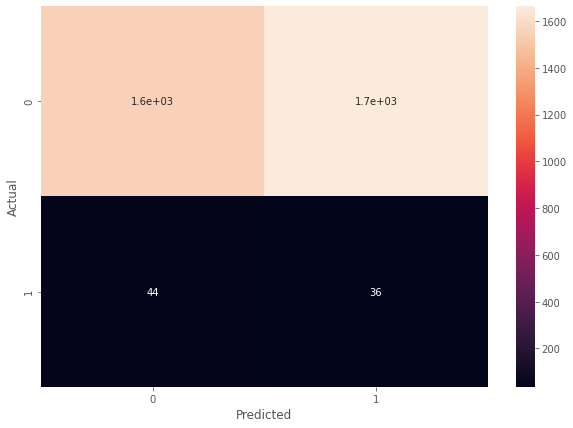

In [ ]:
print('Accuracy of Random Forest Classifier on training set: {:.6f}'.format(rf_model_us.score(X_train_us, Y_train_us)))
print('AUC Score of the Random Forest Classifier is: {:.6f}'.format(roc_auc_score(Y_test, probabilities_rf_us)))
target_names = ['Non-Default', 'Default']

# Classification Report for Random Forest with the Majority Class Undersampled
print(classification_report(Y_test, predictions_rf_us, target_names = target_names))

# Confusion Matrix for Random Forest with the Majority Class Undersampled
confusion_matrix_us = pd.crosstab(Y_test, predictions_rf_us, rownames = ['Actual'], colnames = ['Predicted'])
print(confusion_matrix_us)
sns.heatmap(confusion_matrix_us, annot = True)
plt.show()

### **Classification Report: Minority Oversampled**

Accuracy of Random Forest Classifier on training set: 0.846042
AUC Score of the Random Forest Classifier is: 0.501080
              precision    recall  f1-score   support

 Non-Default       0.98      0.59      0.74      3217
     Default       0.03      0.44      0.05        80

    accuracy                           0.59      3297
   macro avg       0.50      0.51      0.39      3297
weighted avg       0.95      0.59      0.72      3297

Predicted     0     1
Actual               
0          1896  1321
1            45    35


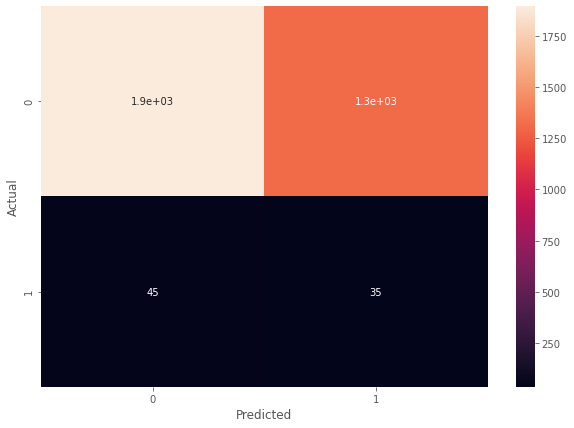

In [ ]:
print('Accuracy of Random Forest Classifier on training set: {:.6f}'.format(rf_model_sm.score(X_train_sm, Y_train_sm)))
print('AUC Score of the Random Forest Classifier is: {:.6f}'.format(roc_auc_score(Y_test, probabilities_rf_sm)))
target_names = ['Non-Default', 'Default']

# Classification Report for Random Forest with the Majority Class Undersampled
print(classification_report(Y_test, predictions_rf_sm, target_names = target_names))

# Confusion Matrix for Random Forest with the Majority Class Undersampled
confusion_matrix_sm = pd.crosstab(Y_test, predictions_rf_sm, rownames = ['Actual'], colnames = ['Predicted'])
print(confusion_matrix_sm)
sns.heatmap(confusion_matrix_sm, annot = True)
plt.show()

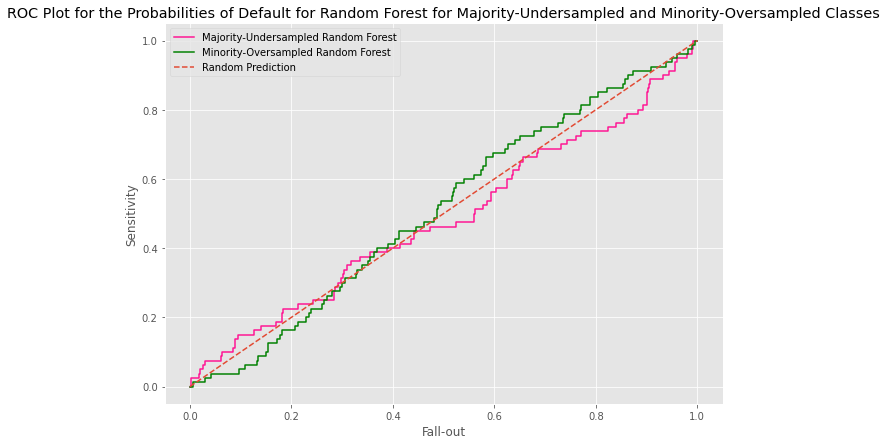

In [ ]:
# ROC chart components
fallout_us, sensitivity_us, thresholds_us = roc_curve(Y_test, probabilities_rf_us)
fallout_sm, sensitivity_sm, thresholds_sm = roc_curve(Y_test, probabilities_rf_sm)

# ROC Chart with both Majority-Undersampled and Minority-Oversampled Random Forest models
plt.plot(fallout_us, sensitivity_us, color = 'deeppink', label='%s' % 'Majority-Undersampled Random Forest')
plt.plot(fallout_sm, sensitivity_sm, color = 'green', label='%s' % 'Minority-Oversampled Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title('ROC Plot for the Probabilities of Default for Random Forest for Majority-Undersampled and Minority-Oversampled Classes')
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

# **7. Model Implementation with Test Dataset**

In [ ]:
rf_model_final = RandomForestClassifier(max_depth = 10, n_estimators = 200, random_state = 10)

rf_model_final.fit(X_train_sm, np.ravel(Y_train_sm))

data = abs(ex3_test)
actual = ex3_test['Target'].astype(int)
data = data.drop(columns = 'Target')
predictions_rf_final = rf_model_final.predict(data)
probabilities_rf_final = rf_model_final.predict_proba(data)[:, 1]

Accuracy of Random Forest Classifier on Final data: 0.544940
AUC Score of the Random Forest Classifier is: 0.534742
              precision    recall  f1-score   support

 Non-Default       0.98      0.55      0.70      4691
     Default       0.02      0.46      0.03        82

    accuracy                           0.54      4773
   macro avg       0.50      0.50      0.37      4773
weighted avg       0.97      0.54      0.69      4773

Predicted     0     1
Actual               
0          2563  2128
1            44    38


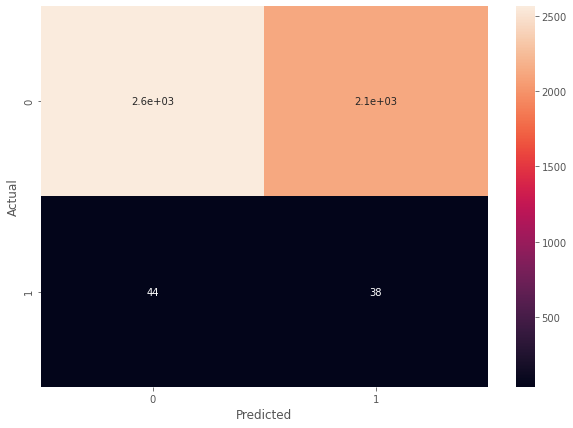

In [ ]:
print('Accuracy of Random Forest Classifier on Final data: {:.6f}'.format(rf_model_final.score(data, actual)))
print('AUC Score of the Random Forest Classifier is: {:.6f}'.format(roc_auc_score(actual, probabilities_rf_final)))
target_names = ['Non-Default', 'Default']

# Classification Report for Random Forest with the Majority Class Undersampled
print(classification_report(actual, predictions_rf_final, target_names = target_names))

# Confusion Matrix for Random Forest with the Majority Class Undersampled
confusion_matrix_final = pd.crosstab(actual, predictions_rf_final, rownames = ['Actual'], colnames = ['Predicted'])
print(confusion_matrix_final)
sns.heatmap(confusion_matrix_final, annot = True)
plt.show()

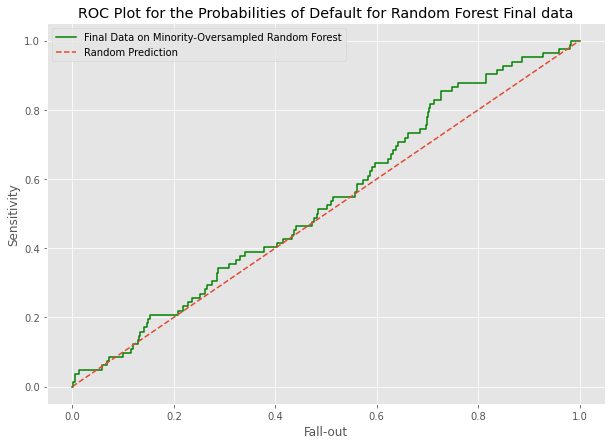

In [ ]:
# ROC chart components
fallout_final, sensitivity_final, thresholds_final = roc_curve(actual, probabilities_rf_final)

# ROC Chart with both

plt.plot(fallout_final, sensitivity_final, color = 'green', label='%s' % 'Final Data on Minority-Oversampled Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title('ROC Plot for the Probabilities of Default for Random Forest Final data')
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [ ]:
id = data.reset_index(drop = True).index
id

RangeIndex(start=0, stop=4773, step=1)

In [ ]:
results_df = pd.DataFrame(data={'ID': id, 'Target': actual.reset_index(drop = True), 
                                'Predicted Target': predictions_rf_final, 
                                'Probability of Default': probabilities_rf_final})
results_df.to_csv('/content/drive/MyDrive/Carbon/modelling_exercise_submission.csv', index=False)

In [ ]:
results_df.head()

,ID,Target,Predicted Target,Probability of Default
0,0,0,0,0.478682
1,1,0,1,0.504646
2,2,0,0,0.462854
3,3,0,1,0.538694
4,4,0,0,0.494827


# ***Seghe Momodu*** 

February 18, 2021